## Importações

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression 

# Configurações para exibição do DataFrame
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
pd.set_option('display.max_rows', None)     # Mostrar todas as linhas
pd.set_option('display.max_colwidth', None) # Mostrar todo o conteúdo das células

## Criação dos modelos de regressão para novos registros

In [2]:
df = pd.read_csv("../dados/nova_plataforma.csv")

In [3]:
df.head(7)

,platform,water_depth (m),weight (t),installation_date,type_of_production (1 oil and gas; 2 oil; 3 gas),number_of_legs,number_of_piles,height_of_jacket_or_sub-structure (m),distance_to_coast (km),risk_to_other_users-complete,risk_to_other_users-partial,risk_to_personnel-complete,risk_to_personnel-partial,energy_consumption-complete (GJ),energy_consumption-partial (GJ),emissions-complete (t),emissions-partial (t),impacts_of_option-complete,impacts_of_option-partial,technical_feasibility_or_challenge-complete,technical_feasibility_or_challenge-partial,commercial_impact_on_fisheries-complete,commercial_impact_on_fisheries-partial,wider_community_impact-complete,wider_community_impact-partial,total_removal_cost-complete,total_removal_cost-partial,recommended (1 partial; 2 complete)
0,1,99,22000,36,1,8,8,114.0,269,1,0.000000e+00,0.290,0.12,1110100,817000,87000,58500,0.00,1.0,0.00,1.00,0.79,0.78,0.5,0.5,1.000,0.560,1
1,2,112,20364,41,1,8,9,123.0,259,1,0.000000e+00,0.320,0.16,1180500,895500,92000,64000,0.00,1.0,0.00,1.00,0.79,0.78,0.5,0.5,1.000,0.560,1
2,20,141,15561,46,2,8,26,147.0,120,0,2.300000e-05,0.025,0.01,297654,530148,24277,31064,0.66,1.0,0.25,1.00,1.00,0.94,1.0,1.0,0.530,1.000,1
3,25,156,27647,44,2,8,32,166.0,240,0,1.500000e-05,0.040,0.02,487750,570818,40416,45266,1.00,1.0,0.50,1.00,1.00,0.66,1.0,1.0,1.000,0.570,1
4,26,103,18584,33,1,8,20,122.5,230,0,7.800000e-08,0.090,0.06,733082,511765,59588,41170,0.00,1.0,0.39,0.15,0.00,0.00,0.0,0.0,1.000,0.730,1
5,27,144,17500,41,3,8,20,154.0,130,0,8.804490e-06,0.140,0.13,520000,568000,42000,44000,0.00,0.0,0.45,0.70,0.00,0.00,0.0,0.0,0.602,0.686,1
6,29,116,10054,31,1,4,5,136.0,282,1,0.000000e+00,0.140,0.08,469823,433179,37162,32191,0.00,1.0,0.00,1.00,0.79,0.78,0.5,0.5,1.000,0.410,1


**OBS:** as colunas `wider_community_impact-partial` e `wider_community_impact-complete` são idênticas. 

### Removendo as mesmas colunas excluídas na gan

In [4]:
colunas_para_dropar = ['platform', 'recommended (1 partial; 2 complete)', 'impacts_of_option-partial']
df[colunas_para_dropar]

,platform,recommended (1 partial; 2 complete),impacts_of_option-partial
0,1,1,1.0
1,2,1,1.0
2,20,1,1.0
3,25,1,1.0
4,26,1,1.0
5,27,1,0.0
6,29,1,1.0


In [5]:
df.shape

(7, 28)

In [6]:
df.drop(colunas_para_dropar, axis=1, inplace=True)

In [7]:
df.shape

(7, 25)

### Matriz de correlação

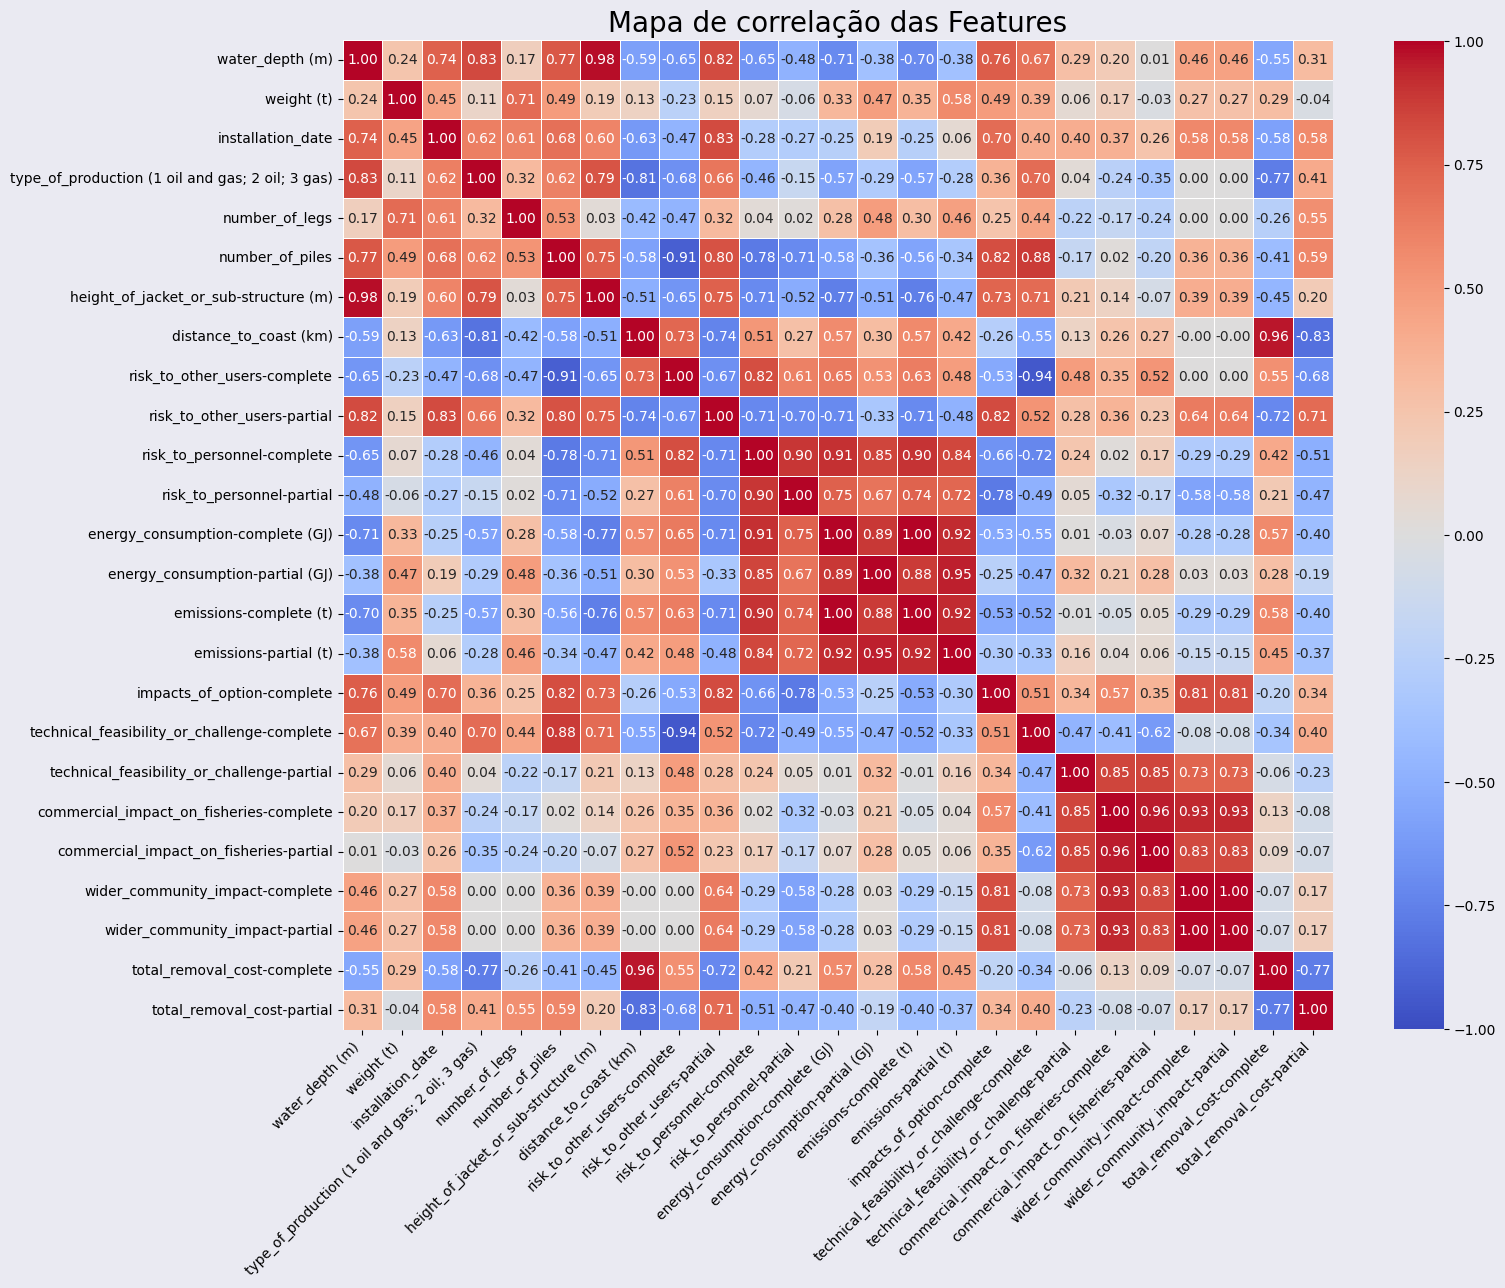

In [8]:
matriz_correlacao = df.corr()

# Plotando o gráfico
plt.figure(figsize=(16, 16), facecolor='#eaeaf2')

ax = sns.heatmap(data=matriz_correlacao,
                xticklabels=df.columns,
                yticklabels=df.columns,
                annot=True, 
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                fmt='.2f',
                linewidths=0.7,
                cbar=True,
                cbar_kws={"shrink": 0.685} 

)

# Ajustando as labels na linha x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# título e apresentação do gráfico
plt.title('Mapa de correlação das Features', fontsize=20)

plt.tight_layout()

plt.show()

### Separando os atributos em grupos com forte correlação

### Função para treinar os modelos de regressão linear

In [9]:
def treinar_atributo(coluna_treinamento, coluna_alvo):
    regressao_linear = LinearRegression()

    # Redimensionando os arrays de entrada
    X = df[coluna_treinamento].values
    y = df[coluna_alvo].values

    # Treinando o modelo
    regressao_linear.fit(X, y)
    return regressao_linear

### Treinamento do Grupo Roxo

![Grupos de correlação forte](grupo_roxo.png)

#### Sorteando o valor de commercial_impact_on_fisheries-complete

In [10]:
df['commercial_impact_on_fisheries-complete']

0    0.79
1    0.79
2    1.00
3    1.00
4    0.00
5    0.00
6    0.79
Name: commercial_impact_on_fisheries-complete, dtype: float64

In [11]:
# Raiz
valor_commercial_impact_on_fisheries_complete = round(random.uniform(df["commercial_impact_on_fisheries-complete"].min(), df["commercial_impact_on_fisheries-complete"].max()), 3)
valor_commercial_impact_on_fisheries_complete, df["commercial_impact_on_fisheries-complete"].dtype

(0.903, dtype('float64'))

In [12]:
df.columns

Index(['water_depth (m)', 'weight (t)', 'installation_date',
       'type_of_production (1 oil and gas; 2 oil; 3 gas)', 'number_of_legs',
       'number_of_piles', 'height_of_jacket_or_sub-structure (m)',
       'distance_to_coast (km)', 'risk_to_other_users-complete',
       'risk_to_other_users-partial', 'risk_to_personnel-complete',
       'risk_to_personnel-partial', 'energy_consumption-complete (GJ)',
       'energy_consumption-partial (GJ)', 'emissions-complete (t)',
       'emissions-partial (t)', 'impacts_of_option-complete',
       'technical_feasibility_or_challenge-complete',
       'technical_feasibility_or_challenge-partial',
       'commercial_impact_on_fisheries-complete',
       'commercial_impact_on_fisheries-partial',
       'wider_community_impact-complete', 'wider_community_impact-partial',
       'total_removal_cost-complete', 'total_removal_cost-partial'],
      dtype='object')

#### Treinando os modelos

In [13]:
# Treinamento dos modelos conectados diretamento com a raiz (altura 1)
technical_feasibility_or_challenge_partial = treinar_atributo(["commercial_impact_on_fisheries-complete"], "technical_feasibility_or_challenge-partial")
commercial_impact_on_fisheries_partial = treinar_atributo(["commercial_impact_on_fisheries-complete"], "commercial_impact_on_fisheries-partial")
wider_community_impact_complete = treinar_atributo(["commercial_impact_on_fisheries-complete"], "wider_community_impact-complete")
wider_community_impact_partial = treinar_atributo(["commercial_impact_on_fisheries-complete"], "wider_community_impact-partial")


#### Estimando valores para um novo registro (Grupo Roxo)

In [14]:
# Altura 1
valor_technical_feasibility_or_challenge_partial = round(technical_feasibility_or_challenge_partial.predict([[valor_commercial_impact_on_fisheries_complete]])[0], 3) 
valor_wider_community_impact_complete = round(wider_community_impact_complete.predict([[valor_commercial_impact_on_fisheries_complete]])[0], 3)

# Altura 2
valor_commercial_impact_on_fisheries_partial = round(commercial_impact_on_fisheries_partial.predict([[valor_commercial_impact_on_fisheries_complete]])[0], 3)
valor_wider_community_impact_partial = round(wider_community_impact_partial.predict([[valor_commercial_impact_on_fisheries_complete]])[0], 3)

In [15]:
# Raiz
print(f"valor_commercial_impact_on_fisheries_complete: {valor_commercial_impact_on_fisheries_complete}")

# Altura 1
print(f"valor_technical_feasibility_or_challenge_partial: {valor_technical_feasibility_or_challenge_partial}")
print(f"valor_wider_community_impact_complete: {valor_wider_community_impact_complete}") 
print(f"valor_commercial_impact_on_fisheries_partial: {valor_commercial_impact_on_fisheries_partial}")
print(f"valor_wider_community_impact_partial: {valor_wider_community_impact_partial}")

valor_commercial_impact_on_fisheries_complete: 0.903
valor_technical_feasibility_or_challenge_partial: 1.011
valor_wider_community_impact_complete: 0.744
valor_commercial_impact_on_fisheries_partial: 0.804
valor_wider_community_impact_partial: 0.744


In [16]:
df[["commercial_impact_on_fisheries-complete", "technical_feasibility_or_challenge-partial", "wider_community_impact-complete", "commercial_impact_on_fisheries-partial", "wider_community_impact-partial"]]

,commercial_impact_on_fisheries-complete,technical_feasibility_or_challenge-partial,wider_community_impact-complete,commercial_impact_on_fisheries-partial,wider_community_impact-partial
0,0.79,1.00,0.5,0.78,0.5
1,0.79,1.00,0.5,0.78,0.5
2,1.00,1.00,1.0,0.94,1.0
3,1.00,1.00,1.0,0.66,1.0
4,0.00,0.15,0.0,0.00,0.0
5,0.00,0.70,0.0,0.00,0.0
6,0.79,1.00,0.5,0.78,0.5


### Treinamento do Grupo Azul

![Grupos de correlação forte](grupo_azul.png)

#### função para mapear o valor type_of_production

In [17]:
def mapear_type_of_production(valor):
    if valor <= 1.5:
        return 1
    elif valor <= 2.5:
        return 2
    else:
        return 3

#### Sorteando valor para "wider_community_impact-complete"

In [18]:
df.columns

Index(['water_depth (m)', 'weight (t)', 'installation_date',
       'type_of_production (1 oil and gas; 2 oil; 3 gas)', 'number_of_legs',
       'number_of_piles', 'height_of_jacket_or_sub-structure (m)',
       'distance_to_coast (km)', 'risk_to_other_users-complete',
       'risk_to_other_users-partial', 'risk_to_personnel-complete',
       'risk_to_personnel-partial', 'energy_consumption-complete (GJ)',
       'energy_consumption-partial (GJ)', 'emissions-complete (t)',
       'emissions-partial (t)', 'impacts_of_option-complete',
       'technical_feasibility_or_challenge-complete',
       'technical_feasibility_or_challenge-partial',
       'commercial_impact_on_fisheries-complete',
       'commercial_impact_on_fisheries-partial',
       'wider_community_impact-complete', 'wider_community_impact-partial',
       'total_removal_cost-complete', 'total_removal_cost-partial'],
      dtype='object')

In [19]:
# Raiz
valor_water_depth = int(random.uniform(df["water_depth (m)"].min(), df["water_depth (m)"].max()))
valor_water_depth, df["water_depth (m)"].dtype

(107, dtype('int64'))

#### Treinamento os modelos

In [20]:
# Altura 1
height_of_jacket_or_sub_structure = treinar_atributo(["water_depth (m)"], "height_of_jacket_or_sub-structure (m)")
installation_date = treinar_atributo(["water_depth (m)"], "installation_date")
risk_to_other_users_partial = treinar_atributo(["water_depth (m)"], "risk_to_other_users-partial")
number_of_piles = treinar_atributo(["water_depth (m)"], "number_of_piles")
type_of_production = treinar_atributo(["water_depth (m)"], "type_of_production (1 oil and gas; 2 oil; 3 gas)")

# Altura 2
technical_feasibility_or_challenge_complete = treinar_atributo(["height_of_jacket_or_sub-structure (m)"], "technical_feasibility_or_challenge-complete")
impacts_of_option_complete = treinar_atributo(["height_of_jacket_or_sub-structure (m)"], "impacts_of_option-complete")
number_of_legs = treinar_atributo(["installation_date"], "number_of_legs")
total_removal_cost_partial = treinar_atributo(["risk_to_other_users-partial"], "total_removal_cost-partial")

# Altura 3
weight = treinar_atributo(["number_of_legs"], "weight (t)")

#### Estimando valores para um novo registro (Grupo azul)

In [21]:
df.head()

,water_depth (m),weight (t),installation_date,type_of_production (1 oil and gas; 2 oil; 3 gas),number_of_legs,number_of_piles,height_of_jacket_or_sub-structure (m),distance_to_coast (km),risk_to_other_users-complete,risk_to_other_users-partial,risk_to_personnel-complete,risk_to_personnel-partial,energy_consumption-complete (GJ),energy_consumption-partial (GJ),emissions-complete (t),emissions-partial (t),impacts_of_option-complete,technical_feasibility_or_challenge-complete,technical_feasibility_or_challenge-partial,commercial_impact_on_fisheries-complete,commercial_impact_on_fisheries-partial,wider_community_impact-complete,wider_community_impact-partial,total_removal_cost-complete,total_removal_cost-partial
0,99,22000,36,1,8,8,114.0,269,1,0.000000e+00,0.290,0.12,1110100,817000,87000,58500,0.00,0.00,1.00,0.79,0.78,0.5,0.5,1.00,0.56
1,112,20364,41,1,8,9,123.0,259,1,0.000000e+00,0.320,0.16,1180500,895500,92000,64000,0.00,0.00,1.00,0.79,0.78,0.5,0.5,1.00,0.56
2,141,15561,46,2,8,26,147.0,120,0,2.300000e-05,0.025,0.01,297654,530148,24277,31064,0.66,0.25,1.00,1.00,0.94,1.0,1.0,0.53,1.00
3,156,27647,44,2,8,32,166.0,240,0,1.500000e-05,0.040,0.02,487750,570818,40416,45266,1.00,0.50,1.00,1.00,0.66,1.0,1.0,1.00,0.57
4,103,18584,33,1,8,20,122.5,230,0,7.800000e-08,0.090,0.06,733082,511765,59588,41170,0.00,0.39,0.15,0.00,0.00,0.0,0.0,1.00,0.73


In [22]:
# Altura 1
valor_height_of_jacket_or_sub_structure = round(height_of_jacket_or_sub_structure.predict([[valor_water_depth]])[0], 3) 
valor_installation_date = int(installation_date.predict([[valor_water_depth]])[0]) 
valor_risk_to_other_users_partial = risk_to_other_users_partial.predict([[valor_water_depth]])[0] 
valor_number_of_piles = int(number_of_piles.predict([[valor_water_depth]])[0]) 
valor_type_of_production = mapear_type_of_production(number_of_piles.predict([[valor_water_depth]])[0]) 

# Altura 2
valor_technical_feasibility_or_challenge_complete = round(technical_feasibility_or_challenge_complete.predict([[valor_height_of_jacket_or_sub_structure]])[0], 3)
valor_impacts_of_option_complete = round(impacts_of_option_complete.predict([[valor_height_of_jacket_or_sub_structure]])[0], 3)
valor_number_of_legs = int(number_of_legs.predict([[valor_installation_date]])[0])
valor_total_removal_cost_partial = round(total_removal_cost_partial.predict([[valor_risk_to_other_users_partial]])[0], 3)

# Altura 3
valor_weight = int(weight.predict([[valor_number_of_legs]])[0])

In [23]:
# Raiz
print(f"valor_water_depth: {valor_water_depth}")

# Altura 1
print(f"valor_height_of_jacket_or_sub_structure: {valor_height_of_jacket_or_sub_structure}")
print(f"valor_installation_date: {valor_installation_date}")
print(f"valor_risk_to_other_users_partial: {valor_risk_to_other_users_partial}")
print(f"valor_number_of_piles: {valor_number_of_piles}")
print(f"valor_type_of_production: {valor_type_of_production}")

# Altura 2
print(f"valor_technical_feasibility_or_challenge_complete: {valor_technical_feasibility_or_challenge_complete}")
print(f"valor_impacts_of_option_complete: {valor_impacts_of_option_complete}")
print(f"valor_number_of_legs: {valor_number_of_legs}")
print(f"valor_total_removal_cost_partial: {valor_total_removal_cost_partial}")

# Altura 3
print(f"valor_weight: {valor_weight}")


valor_water_depth: 107
valor_height_of_jacket_or_sub_structure: 122.953
valor_installation_date: 35
valor_risk_to_other_users_partial: 7.121476086124491e-07
valor_number_of_piles: 11
valor_type_of_production: 3
valor_technical_feasibility_or_challenge_complete: 0.105
valor_impacts_of_option_complete: 0.003
valor_number_of_legs: 6
valor_total_removal_cost_partial: 0.56
valor_weight: 15165


In [24]:
df[["water_depth (m)", "height_of_jacket_or_sub-structure (m)", "installation_date", "risk_to_other_users-partial", "number_of_piles", "type_of_production (1 oil and gas; 2 oil; 3 gas)", "technical_feasibility_or_challenge-complete", "impacts_of_option-complete", "number_of_legs", "total_removal_cost-partial", "weight (t)"]]

,water_depth (m),height_of_jacket_or_sub-structure (m),installation_date,risk_to_other_users-partial,number_of_piles,type_of_production (1 oil and gas; 2 oil; 3 gas),technical_feasibility_or_challenge-complete,impacts_of_option-complete,number_of_legs,total_removal_cost-partial,weight (t)
0,99,114.0,36,0.000000e+00,8,1,0.00,0.00,8,0.560,22000
1,112,123.0,41,0.000000e+00,9,1,0.00,0.00,8,0.560,20364
2,141,147.0,46,2.300000e-05,26,2,0.25,0.66,8,1.000,15561
3,156,166.0,44,1.500000e-05,32,2,0.50,1.00,8,0.570,27647
4,103,122.5,33,7.800000e-08,20,1,0.39,0.00,8,0.730,18584
5,144,154.0,41,8.804490e-06,20,3,0.45,0.00,8,0.686,17500
6,116,136.0,31,0.000000e+00,5,1,0.00,0.00,4,0.410,10054


### Treinamento do Grupo Verde

![Grupos de correlação forte](grupo_verde.png)

#### Criando uma função que mapea valores float para 0 ou 1

In [25]:
def mapear_0_ou_1(valor):
    if valor <= 0.5:
        return 0
    else:
        return 1

#### Sorteando um valor para "energy_consumption-complete" 

In [26]:
valor_risk_to_personnel_complete = round(random.uniform(df["risk_to_personnel-complete"].min(), df["risk_to_personnel-complete"].max()), 3)
valor_risk_to_personnel_complete, df["risk_to_personnel-complete"].dtype

(0.138, dtype('float64'))

#### Treinando os modelos

In [27]:
# Altura 1
risk_to_personnel_partial = treinar_atributo(["risk_to_personnel-complete"], "risk_to_personnel-partial")
energy_consumption_partial = treinar_atributo(["risk_to_personnel-complete"], "energy_consumption-partial (GJ)")
energy_consumption_complete = treinar_atributo(["risk_to_personnel-complete"], "energy_consumption-complete (GJ)")
emissions_complete = treinar_atributo(["risk_to_personnel-complete"], "emissions-complete (t)")
risk_to_other_users_complete = treinar_atributo(["risk_to_personnel-complete"], "risk_to_other_users-complete")

# Algura 2
emissions_partial = treinar_atributo(["energy_consumption-partial (GJ)"], "emissions-partial (t)")
distance_to_coast = treinar_atributo(["risk_to_other_users-complete"], "distance_to_coast (km)")

# Altura 3
total_removal_cost_complete = treinar_atributo(["distance_to_coast (km)"], "total_removal_cost-complete")

#### Estimando valores para um novo registro

In [28]:
# altura 1
valor_risk_to_personnel_partial = round(risk_to_personnel_partial.predict([[valor_risk_to_personnel_complete]])[0], 3)
valor_energy_consumption_partial = int(energy_consumption_partial.predict([[valor_risk_to_personnel_complete]])[0])
valor_energy_consumption_complete = int(energy_consumption_complete.predict([[valor_risk_to_personnel_complete]])[0])
valor_emissions_complete = int(emissions_complete.predict([[valor_risk_to_personnel_complete]])[0])
valor_risk_to_other_users_complete = mapear_0_ou_1(risk_to_other_users_complete.predict([[valor_risk_to_personnel_complete]])[0])

# Altura 2
valor_emissions_partial = int(emissions_partial.predict([[valor_energy_consumption_partial]])[0])
valor_distance_to_coast = int(distance_to_coast.predict([[valor_risk_to_other_users_complete]])[0])

# Altura 3
valor_total_removal_cost_complete = round(total_removal_cost_complete.predict([[valor_distance_to_coast]])[0], 3)

In [29]:
# Raiz
print(f"valor_risk_to_personnel_complete: {valor_risk_to_personnel_complete}")

# Altura 1
print(f"valor_risk_to_personnel_partial: {valor_risk_to_personnel_partial}")
print(f"valor_energy_consumption_partial: {valor_energy_consumption_partial}")
print(f"valor_energy_consumption_complete: {valor_energy_consumption_complete}")
print(f"valor_emissions_complete: {valor_emissions_complete}")
print(f"valor_risk_to_other_users_complete: {valor_risk_to_other_users_complete}")

# Altura 2
print(f"valor_emissions_partial: {valor_emissions_partial}")
print(f"valor_distance_to_coast: {valor_distance_to_coast}")

# Altura 3
print(f"valor_total_removal_cost_complete: {valor_total_removal_cost_complete}")


valor_risk_to_personnel_complete: 0.138
valor_risk_to_personnel_partial: 0.078
valor_energy_consumption_partial: 603965
valor_energy_consumption_complete: 655266
valor_emissions_complete: 52343
valor_risk_to_other_users_complete: 0
valor_emissions_partial: 44201
valor_distance_to_coast: 180
valor_total_removal_cost_complete: 0.757


In [30]:
df[["risk_to_personnel-complete", "risk_to_personnel-partial", "energy_consumption-partial (GJ)", "energy_consumption-complete (GJ)", "emissions-complete (t)", "risk_to_other_users-complete", "emissions-partial (t)", "distance_to_coast (km)", "total_removal_cost-complete"]]

,risk_to_personnel-complete,risk_to_personnel-partial,energy_consumption-partial (GJ),energy_consumption-complete (GJ),emissions-complete (t),risk_to_other_users-complete,emissions-partial (t),distance_to_coast (km),total_removal_cost-complete
0,0.290,0.12,817000,1110100,87000,1,58500,269,1.000
1,0.320,0.16,895500,1180500,92000,1,64000,259,1.000
2,0.025,0.01,530148,297654,24277,0,31064,120,0.530
3,0.040,0.02,570818,487750,40416,0,45266,240,1.000
4,0.090,0.06,511765,733082,59588,0,41170,230,1.000
5,0.140,0.13,568000,520000,42000,0,44000,130,0.602
6,0.140,0.08,433179,469823,37162,1,32191,282,1.000


### Gerando os novos registros

In [31]:
def novos_registros_regressao_linear(quantidade_registros):
   ################################ TREINAMENTO DOS MODELOS ###########################

   # --------------------------- Grupo Azul ------------------------------

   # Altura 1
   height_of_jacket_or_sub_structure = treinar_atributo(["water_depth (m)"], "height_of_jacket_or_sub-structure (m)")
   installation_date = treinar_atributo(["water_depth (m)"], "installation_date")
   risk_to_other_users_partial = treinar_atributo(["water_depth (m)"], "risk_to_other_users-partial")
   number_of_piles = treinar_atributo(["water_depth (m)"], "number_of_piles")
   type_of_production = treinar_atributo(["water_depth (m)"], "type_of_production (1 oil and gas; 2 oil; 3 gas)")

   # Altura 2
   technical_feasibility_or_challenge_complete = treinar_atributo(["height_of_jacket_or_sub-structure (m)"], "technical_feasibility_or_challenge-complete")
   impacts_of_option_complete = treinar_atributo(["height_of_jacket_or_sub-structure (m)"], "impacts_of_option-complete")
   number_of_legs = treinar_atributo(["installation_date"], "number_of_legs")
   total_removal_cost_partial = treinar_atributo(["risk_to_other_users-partial"], "total_removal_cost-partial")

   # Altura 3
   weight = treinar_atributo(["number_of_legs"], "weight (t)")

   # --------------------------- Grupo Roxo ------------------------------

   # Treinamento dos modelos conectados diretamento com a raiz (altura 1)
   technical_feasibility_or_challenge_partial = treinar_atributo(["commercial_impact_on_fisheries-complete"], "technical_feasibility_or_challenge-partial")
   commercial_impact_on_fisheries_partial = treinar_atributo(["commercial_impact_on_fisheries-complete"], "commercial_impact_on_fisheries-partial")
   wider_community_impact_complete = treinar_atributo(["commercial_impact_on_fisheries-complete"], "wider_community_impact-complete")
   wider_community_impact_partial = treinar_atributo(["commercial_impact_on_fisheries-complete"], "wider_community_impact-partial")


   # --------------------------- Grupo Verde ------------------------------
   # Altura 1
   risk_to_personnel_partial = treinar_atributo(["risk_to_personnel-complete"], "risk_to_personnel-partial")
   energy_consumption_partial = treinar_atributo(["risk_to_personnel-complete"], "energy_consumption-partial (GJ)")
   energy_consumption_complete = treinar_atributo(["risk_to_personnel-complete"], "energy_consumption-complete (GJ)")
   emissions_complete = treinar_atributo(["risk_to_personnel-complete"], "emissions-complete (t)")
   risk_to_other_users_complete = treinar_atributo(["risk_to_personnel-complete"], "risk_to_other_users-complete")

   # Algura 2
   emissions_partial = treinar_atributo(["energy_consumption-partial (GJ)"], "emissions-partial (t)")
   distance_to_coast = treinar_atributo(["risk_to_other_users-complete"], "distance_to_coast (km)")

   # Altura 3
   total_removal_cost_complete = treinar_atributo(["distance_to_coast (km)"], "total_removal_cost-complete")

   ######################### CRIAÇÃO DOS REGISTROS ################################
   
   registros = []

   for _ in range(quantidade_registros):
      # -------------------------- Estimando valores do grupo Azul --------------------------------
      # Raiz
      valor_water_depth = int(random.uniform(df["water_depth (m)"].min(), df["water_depth (m)"].max()))
      
      # Altura 1
      valor_height_of_jacket_or_sub_structure = round(height_of_jacket_or_sub_structure.predict([[valor_water_depth]])[0], 3) 
      valor_installation_date = int(installation_date.predict([[valor_water_depth]])[0]) 
      valor_risk_to_other_users_partial = risk_to_other_users_partial.predict([[valor_water_depth]])[0] 
      valor_number_of_piles = int(number_of_piles.predict([[valor_water_depth]])[0]) 
      valor_type_of_production = mapear_type_of_production(number_of_piles.predict([[valor_water_depth]])[0]) 

      # Altura 2
      valor_technical_feasibility_or_challenge_complete = round(technical_feasibility_or_challenge_complete.predict([[valor_height_of_jacket_or_sub_structure]])[0], 3)
      valor_impacts_of_option_complete = round(impacts_of_option_complete.predict([[valor_height_of_jacket_or_sub_structure]])[0], 3)
      valor_number_of_legs = int(number_of_legs.predict([[valor_installation_date]])[0])
      valor_total_removal_cost_partial = round(total_removal_cost_partial.predict([[valor_risk_to_other_users_partial]])[0], 3)

      # Altura 3
      valor_weight = int(weight.predict([[valor_number_of_legs]])[0])
      
      # -------------------------- Estimando valores do grupo Roxo --------------------------------
      # Raiz
      valor_commercial_impact_on_fisheries_complete = round(random.uniform(df["commercial_impact_on_fisheries-complete"].min(), df["commercial_impact_on_fisheries-complete"].max()), 3)

      # Altura 1
      valor_technical_feasibility_or_challenge_partial = round(technical_feasibility_or_challenge_partial.predict([[valor_commercial_impact_on_fisheries_complete]])[0], 3) 
      valor_wider_community_impact_complete = round(wider_community_impact_complete.predict([[valor_commercial_impact_on_fisheries_complete]])[0], 3)

      # Altura 2
      valor_commercial_impact_on_fisheries_partial = round(commercial_impact_on_fisheries_partial.predict([[valor_commercial_impact_on_fisheries_complete]])[0], 3)
      valor_wider_community_impact_partial = round(wider_community_impact_partial.predict([[valor_commercial_impact_on_fisheries_complete]])[0], 3)

      # -------------------------- Estimando valores do grupo Verde --------------------------------
      valor_risk_to_personnel_complete = round(random.uniform(df["risk_to_personnel-complete"].min(), df["risk_to_personnel-complete"].max()), 3)
      
      # Altura 1
      valor_risk_to_personnel_partial = round(risk_to_personnel_partial.predict([[valor_risk_to_personnel_complete]])[0], 3)
      valor_energy_consumption_partial = int(energy_consumption_partial.predict([[valor_risk_to_personnel_complete]])[0])
      valor_energy_consumption_complete = int(energy_consumption_complete.predict([[valor_risk_to_personnel_complete]])[0])
      valor_emissions_complete = int(emissions_complete.predict([[valor_risk_to_personnel_complete]])[0])
      valor_risk_to_other_users_complete = mapear_0_ou_1(risk_to_other_users_complete.predict([[valor_risk_to_personnel_complete]])[0])

      # Altura 2
      valor_emissions_partial = int(emissions_partial.predict([[valor_energy_consumption_partial]])[0])
      valor_distance_to_coast = int(distance_to_coast.predict([[valor_risk_to_other_users_complete]])[0])

      # Altura 3
      valor_total_removal_cost_complete = round(total_removal_cost_complete.predict([[valor_distance_to_coast]])[0], 3)

      # -------------------------- Sorteando valores do grupo Vermelho --------------------------------
      
      # Armazenando os valores estimados em uma lista
      registros.append([valor_water_depth, valor_weight, valor_installation_date,
      valor_type_of_production, valor_number_of_legs,
      valor_number_of_piles, valor_height_of_jacket_or_sub_structure,
      valor_distance_to_coast, valor_risk_to_other_users_complete,
      valor_risk_to_other_users_partial, valor_risk_to_personnel_complete,
      valor_risk_to_personnel_partial, valor_energy_consumption_complete,
      valor_energy_consumption_partial, valor_emissions_complete, valor_emissions_partial,
      valor_impacts_of_option_complete,
      valor_technical_feasibility_or_challenge_complete,
      valor_technical_feasibility_or_challenge_partial,
      valor_commercial_impact_on_fisheries_complete,
      valor_commercial_impact_on_fisheries_partial,
      valor_wider_community_impact_complete, valor_wider_community_impact_partial,
      valor_total_removal_cost_partial, valor_total_removal_cost_complete])

   # Criando DataFrame com os valores estimados
   colunas = ['water_depth (m)', 'weight (t)', 'installation_date',
       'type_of_production (1 oil and gas; 2 oil; 3 gas)', 'number_of_legs',
       'number_of_piles', 'height_of_jacket_or_sub-structure (m)',
       'distance_to_coast (km)', 'risk_to_other_users-complete',
       'risk_to_other_users-partial', 'risk_to_personnel-complete',
       'risk_to_personnel-partial', 'energy_consumption-complete (GJ)',
       'energy_consumption-partial (GJ)', 'emissions-complete (t)',
       'emissions-partial (t)', 'impacts_of_option-complete',
       'technical_feasibility_or_challenge-complete',
       'technical_feasibility_or_challenge-partial',
       'commercial_impact_on_fisheries-complete',
       'commercial_impact_on_fisheries-partial',
       'wider_community_impact-complete', 'wider_community_impact-partial',
       'total_removal_cost-complete', 'total_removal_cost-partial']

   df_novos_registros = pd.DataFrame(registros, columns=colunas)

   return df_novos_registros


In [32]:
df_regressao_linear = novos_registros_regressao_linear(1000)

In [33]:
df.head(10)

,water_depth (m),weight (t),installation_date,type_of_production (1 oil and gas; 2 oil; 3 gas),number_of_legs,number_of_piles,height_of_jacket_or_sub-structure (m),distance_to_coast (km),risk_to_other_users-complete,risk_to_other_users-partial,risk_to_personnel-complete,risk_to_personnel-partial,energy_consumption-complete (GJ),energy_consumption-partial (GJ),emissions-complete (t),emissions-partial (t),impacts_of_option-complete,technical_feasibility_or_challenge-complete,technical_feasibility_or_challenge-partial,commercial_impact_on_fisheries-complete,commercial_impact_on_fisheries-partial,wider_community_impact-complete,wider_community_impact-partial,total_removal_cost-complete,total_removal_cost-partial
0,99,22000,36,1,8,8,114.0,269,1,0.000000e+00,0.290,0.12,1110100,817000,87000,58500,0.00,0.00,1.00,0.79,0.78,0.5,0.5,1.000,0.560
1,112,20364,41,1,8,9,123.0,259,1,0.000000e+00,0.320,0.16,1180500,895500,92000,64000,0.00,0.00,1.00,0.79,0.78,0.5,0.5,1.000,0.560
2,141,15561,46,2,8,26,147.0,120,0,2.300000e-05,0.025,0.01,297654,530148,24277,31064,0.66,0.25,1.00,1.00,0.94,1.0,1.0,0.530,1.000
3,156,27647,44,2,8,32,166.0,240,0,1.500000e-05,0.040,0.02,487750,570818,40416,45266,1.00,0.50,1.00,1.00,0.66,1.0,1.0,1.000,0.570
4,103,18584,33,1,8,20,122.5,230,0,7.800000e-08,0.090,0.06,733082,511765,59588,41170,0.00,0.39,0.15,0.00,0.00,0.0,0.0,1.000,0.730
5,144,17500,41,3,8,20,154.0,130,0,8.804490e-06,0.140,0.13,520000,568000,42000,44000,0.00,0.45,0.70,0.00,0.00,0.0,0.0,0.602,0.686
6,116,10054,31,1,4,5,136.0,282,1,0.000000e+00,0.140,0.08,469823,433179,37162,32191,0.00,0.00,1.00,0.79,0.78,0.5,0.5,1.000,0.410


In [34]:
df_regressao_linear.head(10)

,water_depth (m),weight (t),installation_date,type_of_production (1 oil and gas; 2 oil; 3 gas),number_of_legs,number_of_piles,height_of_jacket_or_sub-structure (m),distance_to_coast (km),risk_to_other_users-complete,risk_to_other_users-partial,risk_to_personnel-complete,risk_to_personnel-partial,energy_consumption-complete (GJ),energy_consumption-partial (GJ),emissions-complete (t),emissions-partial (t),impacts_of_option-complete,technical_feasibility_or_challenge-complete,technical_feasibility_or_challenge-partial,commercial_impact_on_fisheries-complete,commercial_impact_on_fisheries-partial,wider_community_impact-complete,wider_community_impact-partial,total_removal_cost-complete,total_removal_cost-partial
0,132,17720,40,3,7,19,143.819,270,1,9.297692e-06,0.273,0.137,1017618,772550,79751,55789,0.339,0.280,0.987,0.866,0.772,0.711,0.711,0.682,1.035
1,105,15165,35,3,6,10,121.284,270,1,2.530406e-08,0.192,0.102,800207,671399,63306,48836,-0.023,0.091,0.788,0.548,0.497,0.433,0.433,0.550,1.035
2,139,17720,41,3,7,22,149.662,180,0,1.170164e-05,0.061,0.044,448591,507809,36711,37591,0.433,0.329,0.482,0.060,0.075,0.007,0.007,0.717,0.757
3,130,17720,39,3,7,19,142.150,270,1,8.610848e-06,0.260,0.132,982725,756316,77111,54674,0.312,0.266,0.859,0.661,0.595,0.532,0.532,0.673,1.035
4,113,15165,36,3,6,13,127.961,180,0,2.772678e-06,0.128,0.073,628425,591477,50313,43342,0.084,0.147,0.471,0.043,0.060,-0.008,-0.008,0.589,0.757
5,129,17720,39,3,7,18,141.316,270,1,8.267427e-06,0.238,0.122,923675,728843,72645,52785,0.298,0.259,0.692,0.395,0.365,0.300,0.300,0.668,1.035
6,99,15165,34,3,6,8,116.276,270,1,-2.035227e-06,0.190,0.101,794839,668901,62900,48665,-0.104,0.049,0.756,0.498,0.454,0.390,0.390,0.520,1.035
7,118,17720,37,3,7,14,132.134,180,0,4.489787e-06,0.148,0.082,682107,616452,54373,45059,0.151,0.182,0.632,0.300,0.283,0.217,0.217,0.614,0.757
8,149,20276,43,3,8,25,158.008,180,0,1.513586e-05,0.155,0.085,700896,625194,55794,45660,0.567,0.400,0.836,0.625,0.563,0.501,0.501,0.766,0.757
9,99,15165,34,3,6,8,116.276,180,0,-2.035227e-06,0.058,0.043,440539,504062,36101,37333,-0.104,0.049,0.523,0.126,0.132,0.065,0.065,0.520,0.757


In [35]:
df_regressao_linear["water_depth (m)"].duplicated().sum()

943

In [36]:
df_regressao_linear["risk_to_personnel-complete"].duplicated().sum()

715

In [37]:
df_regressao_linear["commercial_impact_on_fisheries-complete"].duplicated().sum()

377

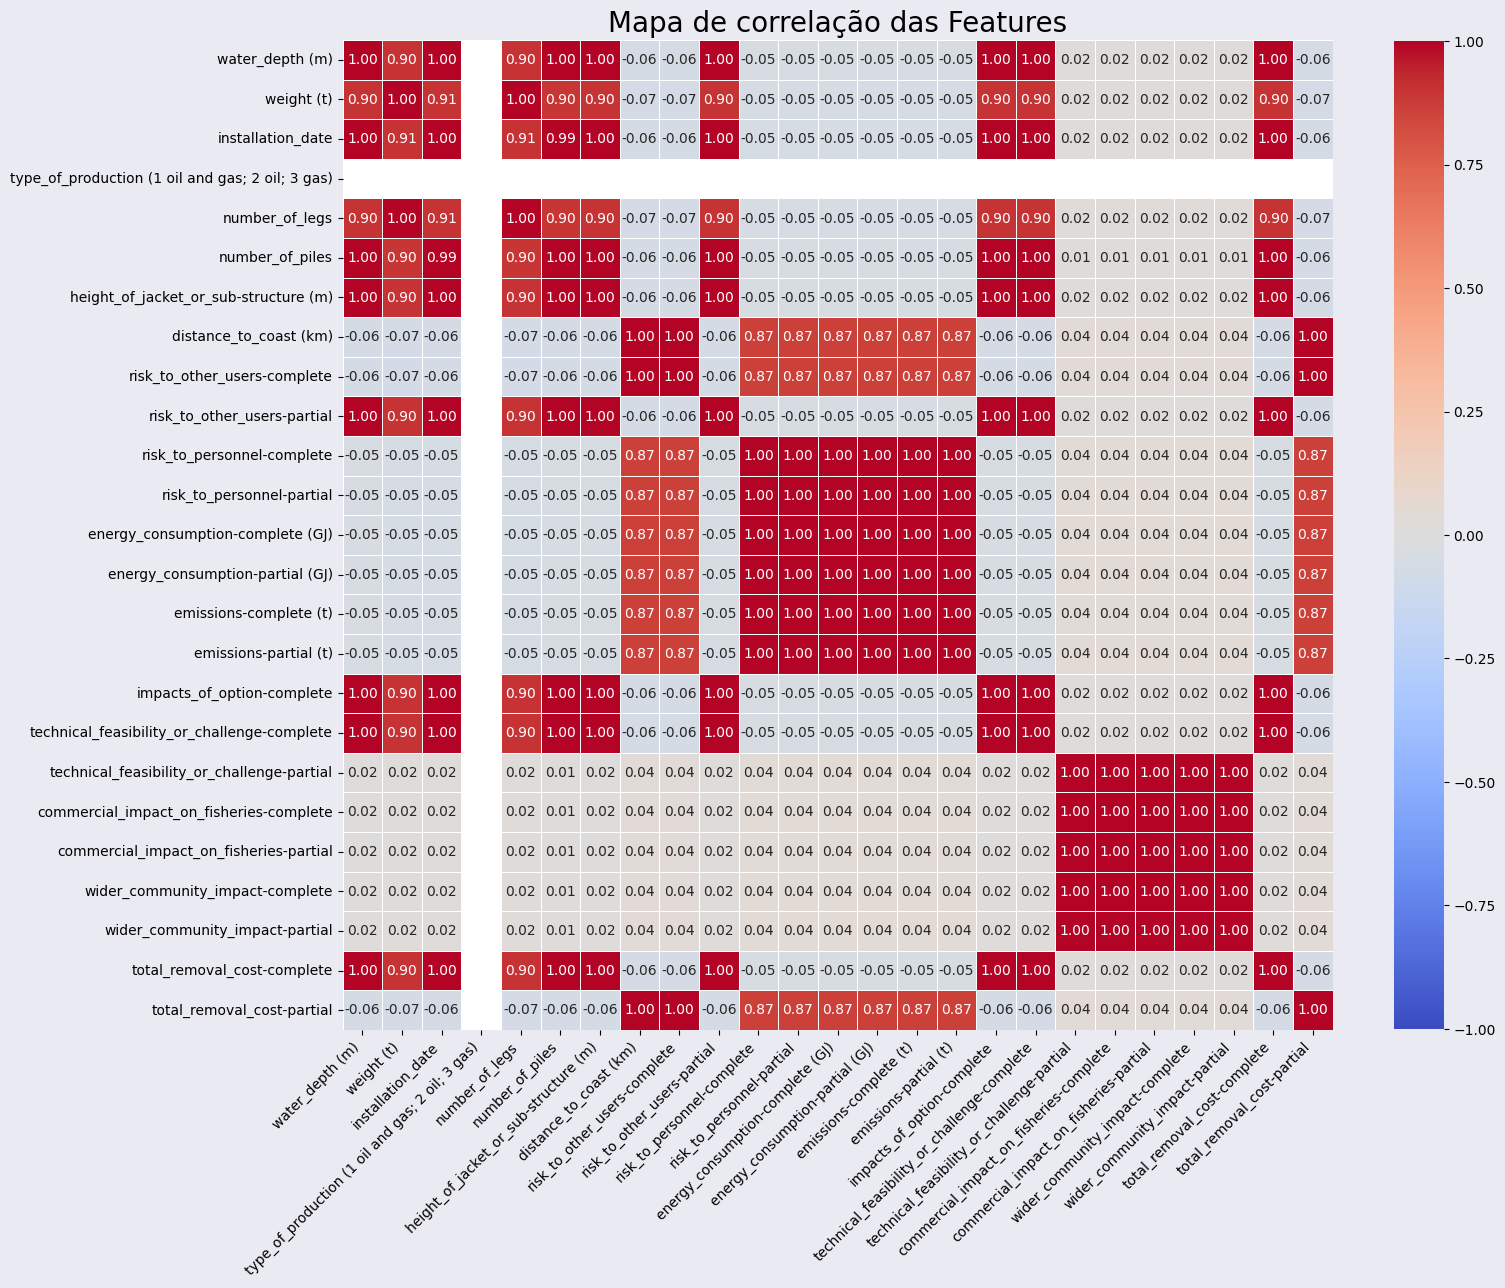

In [38]:
matriz_correlacao = df_regressao_linear.corr()

# Plotando o gráfico
plt.figure(figsize=(16, 16), facecolor='#eaeaf2')

ax = sns.heatmap(data=matriz_correlacao,
                xticklabels=df_regressao_linear.columns,
                yticklabels=df_regressao_linear.columns,
                annot=True, 
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                fmt='.2f',
                linewidths=0.7,
                cbar=True,
                cbar_kws={"shrink": 0.685} 

)

# Ajustando as labels na linha x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# título e apresentação do gráfico
plt.title('Mapa de correlação das Features', fontsize=20)

plt.tight_layout()

plt.show()

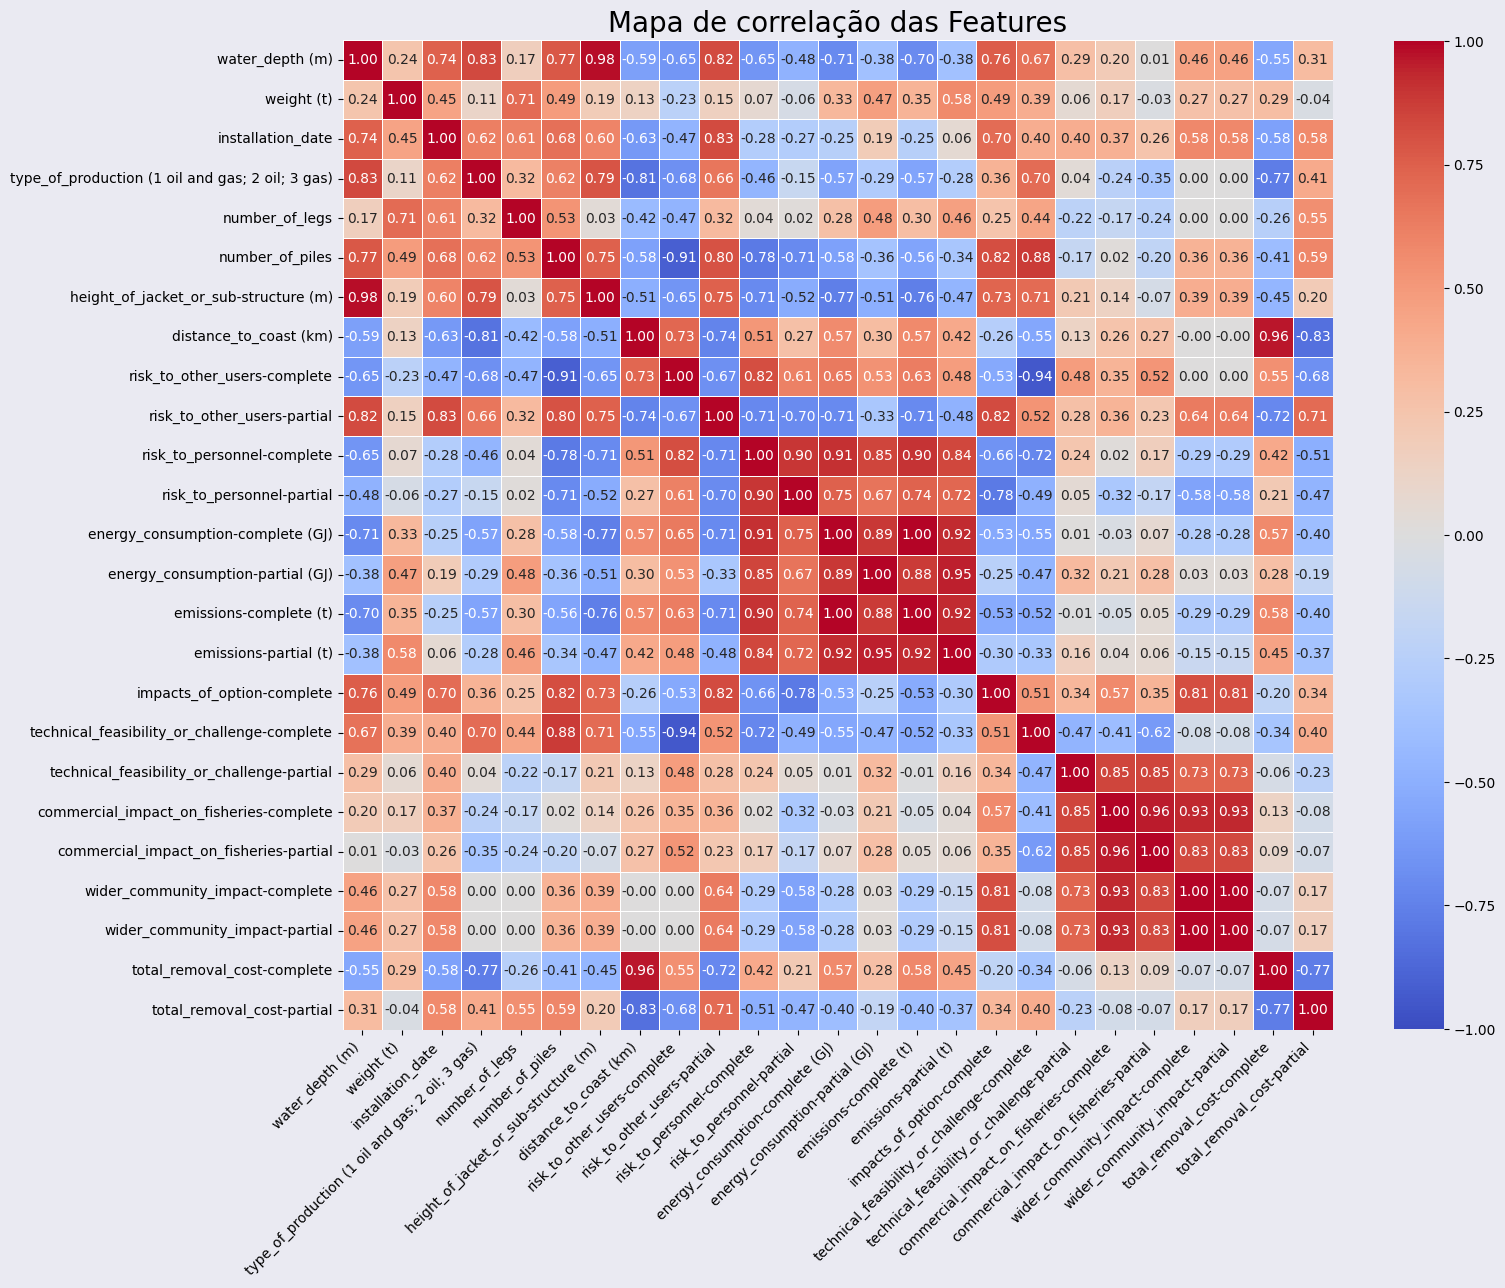

In [39]:
matriz_correlacao = df.corr()

# Plotando o gráfico
plt.figure(figsize=(16, 16), facecolor='#eaeaf2')

ax = sns.heatmap(data=matriz_correlacao,
                xticklabels=df.columns,
                yticklabels=df.columns,
                annot=True, 
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                fmt='.2f',
                linewidths=0.7,
                cbar=True,
                cbar_kws={"shrink": 0.685} 

)

# Ajustando as labels na linha x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# título e apresentação do gráfico
plt.title('Mapa de correlação das Features', fontsize=20)

plt.tight_layout()

plt.show()